### 1. Importing Dataset and Library
First, the necessary libraries are imported, and the dataset is loaded from a CSV file (player_mvp_stats.csv). The dataset is then saved into an Excel file (player_mvp_stats.xlsx) for future use.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

### 2. Data Cleaning
In this section, the data is cleaned and missing values are addressed:

The first and last 5 rows of the data are displayed.
The shape of the dataset and summary statistics are examined.
Null values in the dataset are identified, especially in the columns 3P%, FT%, and FG%, which are calculated based on other columns (3PA, FTA, and FGA).
The missing values are filled with zeros using the fillna(0) method.

In [14]:
df = pd.read_csv('player_mvp_stats.csv', encoding="latin-1", delimiter=";")
df.to_excel("player_mvp_stats.xlsx")

KeyboardInterrupt: 

### 2. Cleaning Data

In [ ]:
# Visualizing the first 5 observations
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,0.1,0.7,0.200,3.0,5.9,0.507,0.486,2.7,3.7,0.738,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991,0,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,0.9,2.7,0.324,5.2,10.1,0.517,0.510,1.4,1.8,0.797,0.7,2.3,3.0,2.2,1.2,0.3,1.0,1.8,14.5,1991,0,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,0.0,0.0,NaN,1.1,2.4,0.455,0.455,0.6,0.9,0.653,0.8,1.1,1.8,0.2,0.2,0.7,0.3,1.4,2.8,1991,0,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,0.0,0.0,NaN,0.7,1.9,0.340,0.340,0.5,0.8,0.571,0.5,0.7,1.2,0.4,0.2,0.0,0.5,0.9,1.8,1991,0,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,0.3,1.2,0.289,8.8,17.5,0.505,0.501,2.7,3.4,0.797,1.4,3.2,4.6,3.5,1.3,0.4,1.6,1.5,21.4,1991,0,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73


In [ ]:
# Visualizing the last 5 observations
df.tail()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,0.5,1.5,0.309,2.0,3.6,0.556,0.529,0.8,1.0,0.846,0.7,2.8,3.5,1.5,0.3,0.6,0.9,1.4,6.2,2017,0,0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,0.1,0.8,0.167,0.1,0.1,1.000,0.357,0.0,0.0,NaN,0.0,0.4,0.4,0.0,0.0,0.0,0.0,0.1,0.6,2017,0,0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,0.4,1.4,0.253,3.9,7.7,0.508,0.489,1.9,3.1,0.606,1.2,4.5,5.7,1.1,0.7,1.0,0.9,1.2,10.8,2017,0,0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,0.5,1.3,0.378,1.0,1.9,0.514,0.536,0.6,0.9,0.653,0.7,1.3,2.0,0.4,0.2,0.5,0.3,1.5,4.0,2017,0,0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14091,Tony Snell,SG,25,MIL,80,80,29.2,3.1,6.8,0.455,1.8,4.4,0.406,1.3,2.3,0.548,0.588,0.6,0.7,0.810,0.3,2.8,3.1,1.2,0.7,0.2,0.7,1.6,8.5,2017,0,0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [ ]:
# Data shape
df.shape

(14092, 41)

Data Description

In [ ]:
df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS
count,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14042.000000,14092.000000,14092.000000,12050.000000,14092.000000,14092.000000,14008.000000,14042.000000,14092.000000,14092.000000,13630.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000
mean,26.750568,52.595586,25.625816,20.379783,3.097005,6.885531,0.438541,0.539015,1.546225,0.275111,2.557707,5.339043,0.465610,0.474708,1.523779,2.039618,0.725372,0.993365,2.585460,3.577164,1.848524,0.657373,0.417450,1.205741,1.878172,8.254449,2006.744394,6.596225,38.792932,0.005719,39.567840,40.081890,0.496628,15.669635,100.689604,100.798120,-0.105202
std,4.242542,25.101975,29.069866,10.115839,2.204090,4.638717,0.092643,0.674970,1.777399,0.162502,1.973365,3.908267,0.098224,0.095544,1.401465,1.773947,0.142843,0.846904,1.807618,2.525621,1.832202,0.459879,0.491581,0.803192,0.827922,5.989571,8.954063,67.841599,208.941452,0.058533,12.899535,12.857063,0.155606,13.155088,6.780205,6.876564,4.568400
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1991.000000,0.000000,0.000000,0.000000,7.000000,9.000000,0.106000,0.000000,81.900000,83.400000,-14.680000
25%,23.000000,33.000000,1.000000,12.000000,1.400000,3.200000,0.401000,0.000000,0.100000,0.200000,1.000000,2.300000,0.429000,0.441000,0.600000,0.800000,0.663000,0.400000,1.300000,1.800000,0.600000,0.300000,0.100000,0.600000,1.300000,3.600000,1999.000000,0.000000,0.000000,0.000000,30.000000,30.000000,0.378000,3.500000,95.800000,96.000000,-3.300000
50%,26.000000,59.000000,11.000000,19.800000,2.600000,5.800000,0.440000,0.300000,0.900000,0.321000,2.000000,4.300000,0.471000,0.483000,1.100000,1.500000,0.750000,0.700000,2.200000,3.000000,1.200000,0.600000,0.300000,1.000000,1.900000,6.700000,2007.000000,0.000000,0.000000,0.000000,41.000000,39.500000,0.512000,14.000000,99.900000,100.500000,-0.015000
75%,30.000000,75.000000,51.000000,28.800000,4.400000,9.700000,0.482000,0.900000,2.600000,0.372000,3.600000,7.500000,0.510000,0.520000,2.000000,2.800000,0.817000,1.400000,3.400000,4.725000,2.500000,0.900000,0.500000,1.600000,2.500000,11.700000,2015.000000,0.000000,0.000000,0.000000,49.000000,49.000000,0.610000,25.000000,104.900000,105.400000,3.187500
max,44.000000,85.000000,83.000000,43.700000,12.700000,27.800000,1.000000,5.300000,13.200000,1.000000,12.100000,23.400000,1.000000,1.500000,10.200000,13.100000,1.000000,6.800000,12.300000,18.700000,14.200000,3.000000,4.500000,5.700000,6.000000,36.100000,2021.000000,1310.000000,1310.000000,1.000000,73.000000,72.000000,0.890000,56.000000,120.100000,130.800000,11.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14092 entries, 0 to 14091
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14092 non-null  object 
 1   Pos      14092 non-null  object 
 2   Age      14092 non-null  int64  
 3   Tm       14092 non-null  object 
 4   G        14092 non-null  int64  
 5   GS       14092 non-null  int64  
 6   MP       14092 non-null  float64
 7   FG       14092 non-null  float64
 8   FGA      14092 non-null  float64
 9   FG%      14042 non-null  float64
 10  3P       14092 non-null  float64
 11  3PA      14092 non-null  float64
 12  3P%      12050 non-null  float64
 13  2P       14092 non-null  float64
 14  2PA      14092 non-null  float64
 15  2P%      14008 non-null  float64
 16  eFG%     14042 non-null  float64
 17  FT       14092 non-null  float64
 18  FTA      14092 non-null  float64
 19  FT%      13630 non-null  float64
 20  ORB      14092 non-null  float64
 21  DRB      140

Checking for Missing Data

In [ ]:
print(df.isnull().sum())
# False - 0, True - 1
df.isnull().sum()

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          50
3P            0
3PA           0
3P%        2042
2P            0
2PA           0
2P%          84
eFG%         50
FT            0
FTA           0
FT%         462
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64


Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          50
3P            0
3PA           0
3P%        2042
2P            0
2PA           0
2P%          84
eFG%         50
FT            0
FTA           0
FT%         462
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64

In the data above, some players have "3P%" as null that is they have no three points Percentage.
3P% is gotten by dividing three points gotten (3P) by three points attempted (3PA)
This is the same for the columns
#### "3P%", "FT%", "FG%" 
Where their "FTA" and "FGA" are both 0 just like "3PA"
$$
3P(\%) = \frac{3P} {3PA} \cdot 100
$$
$$
FT(\%) = \frac{FT} {FTA} \cdot 100
$$
$$
FG(\%) = \frac{FG} {FGA} \cdot 100
$$


In [ ]:
# True or False values where 3P% is null
is_null = df["3P%"].isnull()
# DataFrame containing only rows where 3P% is null
df_with_null = df[is_null]
# DataFrame showing Players with 3P% null and how their 3PA (three points attempted) is 0
df_with_null[["Player", "3PA"]].head()

# df[df["3P%"].isnull()][["Player", "3PA"]].head()

,Player,3PA
2,Elden Campbell,0.0
3,Irving Thomas,0.0
18,Jack Haley,0.0
20,Keith Owens,0.0
30,Benoit Benjamin,0.0


In [ ]:
# True or False values where FT% is null
is_null = df["FT%"].isnull()
# DataFrame containing only rows where FT% is null
df_with_null = df[is_null]
# DataFrame showing Players with FT% null and how their FTA (three points attempted) is 0
df_with_null[["Player", "FTA"]].head()

# df[df["FT%"].isnull()][["Player", "FTA"]].head()

,Player,FTA
77,John Coker,0.0
92,Jason Sasser,0.0
103,Adrian Caldwell,0.0
119,Bruno undov,0.0
158,Jamal Robinson,0.0


In [ ]:
# True or False values where FG% is null
is_null = df["FG%"].isnull()
# DataFrame containing only rows where FG% is null
df_with_null = df[is_null]
# DataFrame showing Players with FG% null and how their FGA (three points attempted) is 0
df_with_null[["Player", "FGA"]].head()

# df[df["FG%"].isnull()][["Player", "FGA"]].head()

,Player,FGA
103,Adrian Caldwell,0.0
250,Guy Rucker,0.0
428,Gani Lawal,0.0
1961,Ronny Turiaf,0.0
2240,Lari Ketner,0.0


In [ ]:
# Fill NA/NAT values with 0
df = df.fillna(0)
df.isnull().sum()
# All null values have been removed

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

#### Setting the Predictor elements
To perform regression we need to remove the target variables as well as remove all string data such as the player names which are irrelevant to the model.
Then we need to convert categorical data such as the player position into dummy variables that can be used for training

In [ ]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS'], dtype='object')

### 3. Feature Engineering
The dataset is preprocessed to prepare it for machine learning:

Irrelevant columns such as Player, Tm, and Team (which contain names) are dropped.
Categorical data, such as the player position (Pos), is converted into dummy variables.
Redundant features that could cause multicollinearity, such as 2P%, 3P%, FG%, are removed.
The target variable is defined as Share, and the rest of the features are used as predictors.

In [7]:
# create dummy variables for "Pos" since it is not numerica but categorical
df_dummy = pd.get_dummies(df["Pos"])
df_dummy.head()

,C,C-PF,PF,PF-C,PF-SF,PG,PG-SF,PG-SG,SF,SF-C,SF-PF,SF-SG,SG,SG-PF,SG-PG,SG-SF
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
# drop the "Pos" Column and add the dummy data in df_dummy to the original dataframe
df_train = df.drop(columns=["Pos"])
df_train.join(df_dummy, lsuffix="_caller", rsuffix="_other")
df_train.head()

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,27,LAL,82,21,26.4,3.1,6.6,0.476,0.1,0.7,0.200,3.0,5.9,0.507,0.486,2.7,3.7,0.738,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991,0,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,29,LAL,82,82,32.1,6.1,12.8,0.477,0.9,2.7,0.324,5.2,10.1,0.517,0.510,1.4,1.8,0.797,0.7,2.3,3.0,2.2,1.2,0.3,1.0,1.8,14.5,1991,0,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,22,LAL,52,0,7.3,1.1,2.4,0.455,0.0,0.0,0.000,1.1,2.4,0.455,0.455,0.6,0.9,0.653,0.8,1.1,1.8,0.2,0.2,0.7,0.3,1.4,2.8,1991,0,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,25,LAL,26,0,4.2,0.7,1.9,0.340,0.0,0.0,0.000,0.7,1.9,0.340,0.340,0.5,0.8,0.571,0.5,0.7,1.2,0.4,0.2,0.0,0.5,0.9,1.8,1991,0,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,29,LAL,78,74,38.6,9.2,18.7,0.492,0.3,1.2,0.289,8.8,17.5,0.505,0.501,2.7,3.4,0.797,1.4,3.2,4.6,3.5,1.3,0.4,1.6,1.5,21.4,1991,0,0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73


Since Player, Tm and Team contain just the names of the players and the clubs they play for, and since all the data in the dataset is from one club we can drop these features

Some features in the dataset are redundant, for example features like 2P%, 3P%, FG% are derived from other columns
<br>
2P, 2PA -> 2P%
<br>
3P, 3PA -> 3P%
<br>
FG, FGA -> FG%
<br>
hence, to avoid co-variance we need to remove these redundant features

In [ ]:
features_to_drop = ["Player", "Tm", "Team"]
redundant_features = ["2P", "2PA", "3P", "3PA", "FG", "FGA", "FT", "FTA", "W", "L"]
features_to_drop.extend(redundant_features)
df_train = df_train.drop(columns=features_to_drop)
df_train.columns

Index(['Age', 'G', 'GS', 'MP', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Pts Won', 'Pts Max', 'Share', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS'], dtype='object')

In [ ]:
target = "Share"
features = df_train.columns.drop([target])
features

Index(['Age', 'G', 'GS', 'MP', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Pts Won', 'Pts Max', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS'], dtype='object')

### 4. Model Training
The dataset is split into training and testing sets:

The training data consists of all years except 2021.
The testing data is limited to the year 2021.
A Ridge regression model is trained on the dataset using the training data, and the model makes predictions for the test data.

In [ ]:
# Splitting the dataset into training and testing sets
# Train = All the years that are not 2021
# Test = The year 2021
train = df_train[~(df_train["Year"] > 2011)]
test = df_train[df_train["Year"] > 2011]

In [ ]:
Xtrain = train[features]
ytrain = train[target]
Xtest = test[features]
ytest = test[target]

In [ ]:
Xtrain.head()

,Age,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,W/L%,GB,PS/G,PA/G,SRS
0,27,82,21,26.4,0.476,0.200,0.507,0.486,0.738,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991,0,0,0.707,5.0,106.3,99.6,6.73
1,29,82,82,32.1,0.477,0.324,0.517,0.510,0.797,0.7,2.3,3.0,2.2,1.2,0.3,1.0,1.8,14.5,1991,0,0,0.707,5.0,106.3,99.6,6.73
2,22,52,0,7.3,0.455,0.000,0.455,0.455,0.653,0.8,1.1,1.8,0.2,0.2,0.7,0.3,1.4,2.8,1991,0,0,0.707,5.0,106.3,99.6,6.73
3,25,26,0,4.2,0.340,0.000,0.340,0.340,0.571,0.5,0.7,1.2,0.4,0.2,0.0,0.5,0.9,1.8,1991,0,0,0.707,5.0,106.3,99.6,6.73
4,29,78,74,38.6,0.492,0.289,0.505,0.501,0.797,1.4,3.2,4.6,3.5,1.3,0.4,1.6,1.5,21.4,1991,0,0,0.707,5.0,106.3,99.6,6.73


In [ ]:
ytrain.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Share, dtype: float64

In [ ]:
Xtest.head()

,Age,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,W/L%,GB,PS/G,PA/G,SRS
256,24,22,0,7.4,0.405,0.500,0.375,0.464,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2,2017,0,0,0.402,28.0,97.9,100.8,-2.53
257,21,3,0,3.3,0.000,0.000,0.000,0.000,0.000,0.0,0.7,0.7,0.0,0.0,0.0,0.3,0.3,0.0,2017,0,0,0.402,28.0,97.9,100.8,-2.53
258,28,62,19,12.5,0.387,0.370,0.396,0.447,0.625,0.3,1.4,1.7,0.9,0.8,0.2,0.7,1.3,2.5,2017,0,0,0.402,28.0,97.9,100.8,-2.53
259,33,65,0,16.7,0.399,0.328,0.476,0.484,0.829,0.2,1.8,2.0,2.1,0.7,0.1,0.9,1.6,6.7,2017,0,0,0.402,28.0,97.9,100.8,-2.53
260,38,54,54,26.4,0.437,0.378,0.463,0.495,0.875,0.4,6.1,6.5,1.5,0.6,0.7,0.9,2.1,14.2,2017,0,0,0.402,28.0,97.9,100.8,-2.53


In [ ]:
ytest.head()

256    0.0
257    0.0
258    0.0
259    0.0
260    0.0
Name: Share, dtype: float64

In [ ]:
reg = Ridge(alpha=.1)
reg.fit(Xtrain, ytrain)

Ridge(alpha=0.1)

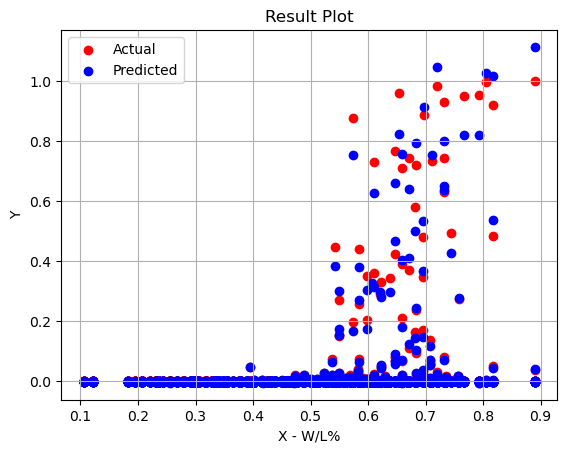

In [ ]:
y_pred = reg.predict(Xtest)
plt.scatter(Xtest["W/L%"], ytest, color="r")
plt.scatter(Xtest["W/L%"], y_pred, color="b")
plt.legend(["Actual", "Predicted"])
plt.grid(which="major", visible=True)
plt.xlabel("X - W/L%")
plt.ylabel("Y")
plt.title("Result Plot")
plt.show()

### 5. Model Evaluation
The performance of the regression model is evaluated using mean squared error (MSE), and a scatter plot is generated to compare actual vs. predicted values.

In [ ]:
mse = mean_squared_error(ytest, y_pred)
print(f"Accuracy is: {(1 - mse)*100:.3f}%")

Accuracy is: 99.996%


### 6. MVP Prediction
The model is then used to predict the MVP for the year 2001:

The dataset for the year 2001 is filtered, and the model is used to predict the MVP votes.
The player with the highest predicted vote share is identified as the predicted MVP.


In [ ]:
mvp_test = df[df["Year"]==2001]
mvp_Ytest = mvp_test[target]
features_to_drop.extend(["Pos", target])
mvp_Xtest = mvp_test.drop(columns=features_to_drop)


def get_mvp(dataset, target_name, max_votes, votes=None):
    if votes is None:
        max_condition = dataset[target_name] == max_votes
    else:
        max_condition = votes == max_votes

    mvp_player = dataset["Player"][max_condition]
    mvp_player = mvp_player.tolist()
    return mvp_player[0]


max_votes = np.max(mvp_test[target])
true_mvp = get_mvp(mvp_test, target, max_votes)
true_mvp

'Allen Iverson'

In [ ]:
predicted_votes = reg.predict(mvp_Xtest)
max_pred_votes = np.max(predicted_votes) 
pred_mvp = get_mvp(mvp_test, target, max_pred_votes, predicted_votes)
pred_mvp

'Allen Iverson'